In [2]:
# import all the package.
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_curve
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
# select our target variable and turn the categorical variable into dummy variable.
df = pd.read_csv('CHDdata.csv')
df_X = df.iloc[:, :-1]
df_X.describe()


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [4]:
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [ ]:
DeepnoteChart(df_X, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"bin":true,"sort":null,"type":"quantitative","field":"tobacco","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"aggregate":"count"}}}""")

# Data Pre-processing

In [5]:
df_X['famhist'] = [1 if x =='Present' else 0 for x in df_X['famhist']]

# standardize the data
def standardize(df):
    for column in df.columns:
        if column == 'famhist':
            df[column] = df[column]
        else:
            df[column] = (df[column] - np.mean(df[column]))/np.std(df[column])
    return df

df_X = standardize(df_X)

df_X['tobacco'] = np.log(df['tobacco'])
df_X['alcohol'] = np.log(df['alcohol'])
df_X.replace([np.inf, -np.inf], 0, inplace=True)

# train test split
target = df['chd']
train_X, test_X, train_y, test_y = train_test_split(df_X, target, test_size=0.33, random_state=1)



/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df_X

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.058564,2.484907,0.478412,-0.295503,1,-0.418470,-0.176786,4.576771,0.629336
1,0.277089,-4.605170,-0.159680,0.412140,0,0.193344,0.671373,0.722706,1.383115
2,-0.992806,-2.525729,-0.609245,0.884332,1,-0.112563,0.735519,1.337629,0.218184
3,1.546985,2.014903,0.807126,1.624141,1,-0.214532,1.412621,3.188829,1.040488
4,-0.211332,2.610070,-0.599577,0.305351,1,0.703189,-0.012856,4.048998,0.423760
...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.916291,0.599263,0.812281,0,1.111065,0.571590,0.000000,1.040488
458,2.133091,1.435085,-0.159680,0.861173,0,-0.112563,0.609602,2.929592,0.629336
459,-1.481228,1.098612,-1.522877,-1.309364,0,-1.336191,-1.414575,3.282414,0.834912
460,-0.992806,1.686399,3.320823,0.692625,0,1.111065,0.310252,3.176803,-0.192969


In [7]:
DeepnoteChart(df_X, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"bin":true,"sort":null,"type":"quantitative","field":"tobacco","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"aggregate":"count"}}}""")

In [8]:
df_X.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
count,4.620000e+02,462.000000,4.620000e+02,4.620000e+02,462.000000,4.620000e+02,4.620000e+02,462.000000,4.620000e+02
mean,-1.384174e-16,0.707151,3.421986e-16,1.807116e-16,0.415584,-9.227828e-17,5.978863e-16,1.814956,-9.612321e-18
std,1.001084e+00,1.279882,1.001084e+00,1.001084e+00,0.493357,1.001084e+00,1.001084e+00,1.570087,1.001084e+00
min,-1.823123e+00,-4.605170,-1.817753e+00,-2.401708e+00,0.000000,-4.089354e+00,-2.695129e+00,-1.660731,-1.906103e+00
25%,-6.997535e-01,0.000000,-7.047170e-01,-7.245926e-01,0.000000,-6.224081e-01,-7.267824e-01,0.000000,-8.096968e-01
50%,-2.113321e-01,0.693147,-1.935182e-01,9.112757e-02,0.000000,-1.059418e-02,-5.680824e-02,2.016147,1.496582e-01
75%,4.724579e-01,1.704748,5.074164e-01,7.489145e-01,1.000000,7.031887e-01,5.828745e-01,3.173549,8.349118e-01
max,3.891408e+00,3.440418,5.119082e+00,2.197976e+00,1.000000,2.538631e+00,4.878906e+00,4.991724,1.451640e+00


In [9]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    float64
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    float64
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 32.6 KB


In [10]:
df_X.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.058564,2.484907,0.478412,-0.295503,1,-0.418470,-0.176786,4.576771,0.629336
1,0.277089,-4.605170,-0.159680,0.412140,0,0.193344,0.671373,0.722706,1.383115
2,-0.992806,-2.525729,-0.609245,0.884332,1,-0.112563,0.735519,1.337629,0.218184
3,1.546985,2.014903,0.807126,1.624141,1,-0.214532,1.412621,3.188829,1.040488
4,-0.211332,2.610070,-0.599577,0.305351,1,0.703189,-0.012856,4.048998,0.423760
5,-0.309016,1.824549,0.836130,1.389975,1,0.907127,1.122774,2.649008,0.149658
6,0.179405,1.398717,-0.657585,-1.184561,0,0.601220,-1.243518,0.963174,-0.330019
7,-1.188175,1.406097,-0.072667,-1.390421,1,0.907127,-0.697085,1.905088,1.040488
8,-1.188175,0.000000,-0.440054,-0.772841,1,-0.418470,-0.281321,0.912283,-0.946748
9,-0.309016,0.000000,0.512250,0.714497,1,1.620910,0.965971,0.000000,0.697861


In [11]:
target.value_counts()

0    302
1    160
Name: chd, dtype: int64

As shown above, there is an imbalance in the target variable, where more than 2/3 of data entries are "negative"/ "0". In the following sections, we will first explore the data set and build models without resampling and bootstrapping. And then, we would implement resampling to compare and contrast prediction results across models. 

# No Resampling and Bootstrapping of the dataset:

# Baseline Model

In [12]:
df.groupby('chd').size()

chd
0    302
1    160
dtype: int64

In [13]:
# Baseline Model: Predict the most frequent result.
df.groupby('chd').size()
most_frequent = df.groupby('chd').size()[0]
baseline_accuracy = most_frequent/(most_frequent + df.groupby('chd').size()[1])
print('baseline model accuracy:', baseline_accuracy)

baseline model accuracy: 0.6536796536796536


# LogisticRegression Model

In [14]:
# Try the first logistic regression to see if this predict the result better than Baseline Model
lg = LogisticRegression()
lg.fit(train_X, train_y)
lg_pred = lg.predict(test_X)

percentage_log=lg.score(test_X,test_y)
res_log=confusion_matrix(test_y,lg_pred)
print("validation confusion matrix")
print(res_log)
print(classification_report(test_y, lg_pred))
# check the accuracy on the training set
print('training accuracy = '+str(lg.score(train_X, train_y)*100))
print('testing accuracy = '+str(lg.score(test_X, test_y)*100))

validation confusion matrix
[[88 11]
 [27 27]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        99
           1       0.71      0.50      0.59        54

    accuracy                           0.75       153
   macro avg       0.74      0.69      0.70       153
weighted avg       0.75      0.75      0.74       153

training accuracy = 72.81553398058253
testing accuracy = 75.16339869281046


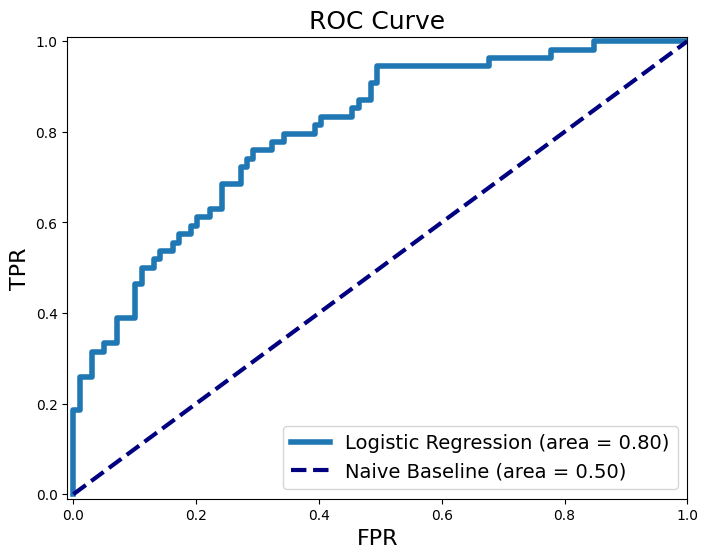

In [15]:
# Plot the Roc_curve to 
lg_pred_proba = lg.predict_proba(test_X)
fpr, tpr, thresholds  = roc_curve(test_y, lg_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=4, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

# Linear Discriminant Analysis

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(train_X,train_y)

lda_pred = lda.predict(test_X)
print('lda accuracy is:', lda.score(test_X, test_y))

percentage_lda=lda.score(test_X,test_y)
res_lda=confusion_matrix(test_y,lda_pred)
print("validation confusion matrix")
print(res_lda)
print(classification_report(test_y, lda_pred))
# check the accuracy on the training set
print('training accuracy = '+str(lda.score(train_X, train_y)*100))
print('testing accuracy = '+str(lda.score(test_X, test_y)*100))

lda accuracy is: 0.7450980392156863
validation confusion matrix
[[88 11]
 [28 26]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.70      0.48      0.57        54

    accuracy                           0.75       153
   macro avg       0.73      0.69      0.70       153
weighted avg       0.74      0.75      0.73       153

training accuracy = 73.13915857605178
testing accuracy = 74.50980392156863


In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
logi_prec = precision_score(test_y, lda_pred)
logi_reca = recall_score(test_y, lda_pred)
logi_f1 = f1_score(test_y, lda_pred)
logi_accuracy = lda.score(test_X, test_y)
print(logi_accuracy, logi_prec, logi_reca, logi_f1)

0.7450980392156863 0.7027027027027027 0.48148148148148145 0.5714285714285714


# Decision Tree Classifier

In [28]:
blank_tree = DecisionTreeClassifier()
blank_tree.fit(train_X, train_y)
tree_pred = blank_tree.predict(test_X)
accuracy_score(test_y, tree_pred)

0.6339869281045751

In [25]:
test_X

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
330,0.765511,-1.171183,-1.165159,-1.148535,0,-2.049974,-0.485639,2.470639,-1.769052
101,1.351616,-2.659260,-0.343373,0.499631,0,-0.010594,0.552583,0.000000,-1.083798
191,-0.504385,-0.356675,0.077188,1.545657,1,1.926817,2.351060,1.128171,0.423760
66,-0.699754,1.572774,-0.725262,-0.554115,1,-0.520439,0.581093,2.130610,-0.878222
326,-0.309016,0.000000,0.913475,0.536943,1,-1.642098,0.799666,0.943906,1.314589
...,...,...,...,...,...,...,...,...,...
422,0.570142,2.624669,0.173868,0.520217,1,-0.112563,0.445672,4.353627,0.834912
159,0.277089,1.909543,0.343059,0.566535,0,-0.010594,-0.100760,3.266904,0.012607
27,0.325931,2.208274,0.241545,0.275758,0,0.601220,-1.207881,3.072693,1.246064
89,-0.797438,-0.328504,-0.338539,0.897198,0,-1.948005,0.545456,0.000000,0.834912


In [19]:
tree = DecisionTreeClassifier()
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 100)}

cv_tree = GridSearchCV(tree, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose = 1)
cv_tree.fit(train_X, train_y)

acc = cv_tree.cv_results_['mean_test_score']
ccp = cv_tree.cv_results_['param_ccp_alpha'].data

result_table = pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).sort_values('Validation Accuracy', ascending = False)
model_1d_acc = max(result_table['Validation Accuracy'])
model_1d_best_ccp_alpha = result_table.reset_index()['ccp alpha'][0]

best_model = DecisionTreeClassifier(ccp_alpha = model_1d_best_ccp_alpha)
best_model.fit(train_X, train_y)
bm_pred = best_model.predict(test_X)
model_1d_test_result = best_model.score(test_X, test_y)

print(f'CV CART Validation Accuracy: {model_1d_acc:.4f}')
print(f'CV CART Test Accuracy: {model_1d_test_result:.4f}')
print(f'Best ccp_alpha: {model_1d_best_ccp_alpha:.4f}')


percentage_dt=best_model.score(test_X,test_y)
res_dt=confusion_matrix(test_y,bm_pred)
print("validation confusion matrix")
print(res_dt)
print(classification_report(test_y, bm_pred))
# check the accuracy on the training set
print('training accuracy = '+str(best_model.score(train_X, train_y)*100))
print('testing accuracy = '+str(best_model.score(test_X, test_y)*100))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
CV CART Validation Accuracy: 0.6896
CV CART Test Accuracy: 0.6863
Best ccp_alpha: 0.0343
validation confusion matrix
[[72 27]
 [21 33]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        99
           1       0.55      0.61      0.58        54

    accuracy                           0.69       153
   macro avg       0.66      0.67      0.66       153
weighted avg       0.70      0.69      0.69       153

training accuracy = 70.22653721682848
testing accuracy = 68.62745098039215


In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
detree_prec = precision_score(test_y, bm_pred)
detree_reca = recall_score(test_y, bm_pred)
detree_f1 = f1_score(test_y, bm_pred)
detree_accuracy = best_model.score(test_X, test_y)
print(detree_accuracy, detree_prec, detree_reca, detree_f1)

0.6862745098039216 0.55 0.6111111111111112 0.5789473684210527


# Neural Network

In [21]:
X = df.drop(columns=['chd'])
X = X.replace(to_replace = ['Absent','Present'],value = ['0','1'])
X.iloc[:,0:4] = df.iloc[:,0:4].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X.iloc[:,5:10] = df.iloc[:,5:10].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
X_norm = X

y = df['chd']
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)



In [22]:
X_train

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
411,1.350153,-0.617382,0.429606,1.388470,0,-0.316158,2.058981,0.480192,1.176264
265,-0.991731,-0.765432,-1.342562,-0.655048,0,-1.640320,-1.432029,-0.597376,-1.698685
57,-0.601417,0.318821,-0.859683,0.140510,0,0.193134,-0.124384,-0.192165,-0.329662
199,0.471946,-0.791559,-0.038787,-0.130674,0,-0.316158,-0.186087,-0.531611,-1.082625
175,-0.796574,0.079327,0.241283,0.319158,1,-0.825451,0.112939,-0.696228,1.244715
...,...,...,...,...,...,...,...,...,...
106,-1.479624,-0.464977,-0.198137,-0.053560,0,1.313579,-0.890934,0.186087,1.244715
270,-0.406260,-0.791559,-0.280227,1.802315,1,-0.723593,0.941193,-0.696228,0.834008
348,-0.406260,-0.774141,0.410291,0.001705,1,-0.316158,-0.252538,-0.440111,0.012594
435,-0.113525,-0.791559,-1.434309,-0.647337,0,-0.825451,-1.076046,-0.612081,-1.835587


In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

clf = MLPClassifier(hidden_layer_sizes=(10,30,10), alpha=0.0001, activation = 'tanh', max_iter=200, learning_rate='constant',solver='sgd')
clf.fit(X_train,y_train)
y_predict_train = clf.predict(X_train)
print(accuracy_score(y_train,y_predict_train))

y_predict_test = clf.predict(X_test)
print(accuracy_score(y_test,y_predict_test))

percentage_clf = clf.score(X_test,y_test)
res_clf=confusion_matrix(y_test,y_predict_test)
print("validation confusion matrix")
print(res_clf)
print(classification_report(y_test, y_predict_test))
# check the accuracy on the training set
print('training accuracy = '+str(clf.score(X_train, y_train)*100))
print('testing accuracy = '+str(clf.score(X_test, y_test)*100))

0.7100271002710027
0.7096774193548387
validation confusion matrix
[[52  7]
 [20 14]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        59
           1       0.67      0.41      0.51        34

    accuracy                           0.71        93
   macro avg       0.69      0.65      0.65        93
weighted avg       0.70      0.71      0.69        93

training accuracy = 71.00271002710026
testing accuracy = 70.96774193548387
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
nn_prec = precision_score(y_test, y_predict_test)
nn_reca = recall_score(y_test, y_predict_test)
nn_f1 = f1_score(y_test, y_predict_test)
nn_accuracy = clf.score(X_test, y_test)
print(nn_accuracy, nn_prec, nn_reca, nn_f1)

0.7096774193548387 0.6666666666666666 0.4117647058823529 0.509090909090909


# Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(train_X, train_y)
rf_pred = rf.predict(test_X)
model_1e_acc = accuracy_score(test_y, rf_pred)
print(f'Random Forest Test Accuracy: {model_1e_acc:.4f}')

percentage_rf= rf.score(test_X,test_y)
res_rf=confusion_matrix(test_y,rf_pred)
print("validation confusion matrix")
print(res_rf)
print(classification_report(test_y, rf_pred))
# check the accuracy on the training set
print('training accuracy = '+str(rf.score(train_X, train_y)*100))
print('testing accuracy = '+str(rf.score(test_X, test_y)*100))

Random Forest Test Accuracy: 0.7059
validation confusion matrix
[[89 10]
 [35 19]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        99
           1       0.66      0.35      0.46        54

    accuracy                           0.71       153
   macro avg       0.69      0.63      0.63       153
weighted avg       0.70      0.71      0.68       153

training accuracy = 100.0
testing accuracy = 70.58823529411765


In [ ]:
df_X.shape

(462, 9)

In [29]:
rf1 = RandomForestClassifier()

grid_values = {'max_features': np.arange(1,10)}
cv_rf = GridSearchCV(rf1, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose = 1)
cv_rf.fit(train_X, train_y)

acc = cv_rf.cv_results_['mean_test_score']
max_features = cv_rf.cv_results_['param_max_features'].data

table = pd.DataFrame({'max_features' : max_features, 'Validation Accuracy': acc}).sort_values('Validation Accuracy', ascending = False)

best_max_feature = table.reset_index()['max_features'][0]

best_cv_rf = RandomForestClassifier(max_features = best_max_feature)
best_cv_rf.fit(train_X, train_y)

best_cv_pred = best_cv_rf.predict(test_X)
model_2e_acc = best_cv_rf.score(test_X, test_y)
print('best max feature number is:', best_max_feature)
print(f'CV Random Forest Test Accuracy: {model_2e_acc:.4f}')

percentage_rf_b= best_cv_rf.score(test_X,test_y)
res_rf_b=confusion_matrix(test_y,best_cv_pred)
print("validation confusion matrix")
print(res_rf_b)
print(classification_report(test_y, best_cv_pred))
# check the accuracy on the training set
print('training accuracy = '+ str(best_cv_rf.score(train_X, train_y)*100))
print('testing accuracy = '+ str(best_cv_rf.score(test_X, test_y)*100))



Fitting 10 folds for each of 9 candidates, totalling 90 fits
best max feature number is: 5
CV Random Forest Test Accuracy: 0.6993
validation confusion matrix
[[87 12]
 [34 20]]
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        99
           1       0.62      0.37      0.47        54

    accuracy                           0.70       153
   macro avg       0.67      0.62      0.63       153
weighted avg       0.69      0.70      0.68       153

training accuracy = 100.0
testing accuracy = 69.93464052287581


In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
ranfor_prec = precision_score(test_y, best_cv_pred)
ranfor_reca = recall_score(test_y, best_cv_pred)
ranfor_f1 = f1_score(test_y, best_cv_pred)
ranfor_accuracy = best_cv_rf.score(test_X, test_y)
print(ranfor_accuracy, ranfor_prec, ranfor_reca, ranfor_f1)

0.6993464052287581 0.625 0.37037037037037035 0.4651162790697674


In [ ]:
best_cv_rf.feature_importances_

array([0.10792752, 0.13291309, 0.13123926, 0.11306222, 0.02729006,
       0.10938408, 0.10090082, 0.09620008, 0.18108287])

# With Resampling of the data set:

In [58]:
#Convert string to integers in the famhist column
data_2 = df
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data_2['famhist']=enc.fit_transform(data_2['famhist'])
data_2

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,0.504274,0.384615,0.331010,0.457902,1,0.553846,0.332497,0.660371,0.755102,1.0
1,0.367521,0.000321,0.239024,0.611748,0,0.646154,0.444479,0.013996,0.979592,1.0
2,0.145299,0.002564,0.174216,0.714406,1,0.600000,0.452949,0.025885,0.632653,0.0
3,0.589744,0.240385,0.378397,0.875245,1,0.584615,0.542346,0.164821,0.877551,1.0
4,0.282051,0.435897,0.175610,0.588531,1,0.723077,0.354141,0.389565,0.693878,1.0
...,...,...,...,...,...,...,...,...,...,...
457,0.965812,0.012821,0.348432,0.698741,0,0.784615,0.431305,0.000000,0.877551,0.0
458,0.692308,0.134615,0.239024,0.709371,0,0.600000,0.436324,0.127183,0.755102,1.0
459,0.059829,0.096154,0.042509,0.237483,0,0.415385,0.169072,0.180991,0.816327,0.0
460,0.145299,0.173077,0.740767,0.672727,0,0.784615,0.396801,0.162851,0.510204,0.0


In [52]:
DeepnoteChart(data_2, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"bin":true,"sort":null,"type":"quantitative","field":"chd","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"aggregate":"count"}}}""")

In [34]:
#Another way of standarize the data set
for x in data_2.columns:
    data_2[x]=(data_2[x]-data_2[x].min())/(data_2[x].max()-data_2[x].min())
data_2.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,0.504274,0.384615,0.331010,0.457902,1.0,0.553846,0.332497,0.660371,0.755102,1.0
1,0.367521,0.000321,0.239024,0.611748,0.0,0.646154,0.444479,0.013996,0.979592,1.0
2,0.145299,0.002564,0.174216,0.714406,1.0,0.600000,0.452949,0.025885,0.632653,0.0
3,0.589744,0.240385,0.378397,0.875245,1.0,0.584615,0.542346,0.164821,0.877551,1.0
4,0.282051,0.435897,0.175610,0.588531,1.0,0.723077,0.354141,0.389565,0.693878,1.0


In [57]:
#Boostrapping the original dataset
cls_resampled_0 = data_2[data_2['chd']==0]
cls_resampled_1 = data_2[data_2['chd']==1]
cls_resampled_1= cls_resampled_1.sample(500,replace=True)
cls_resampled_0= cls_resampled_0.sample(500,replace=True)
data_resampled = pd.concat([cls_resampled_0,cls_resampled_1],axis=0)
data_resampled

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
326,0.264957,0.000000,0.393728,0.638881,1.0,0.369231,0.461418,0.017460,0.959184,0.0
163,0.401709,0.000000,0.199303,0.294266,0.0,0.876923,0.166248,0.000000,0.122449,0.0
203,0.230769,0.023397,0.208362,0.469371,0.0,0.630769,0.285759,0.130444,1.000000,0.0
79,0.059829,0.012821,0.343554,0.452587,1.0,0.676923,0.345671,0.489164,0.489796,0.0
363,0.555556,0.019231,0.100348,0.763357,1.0,0.615385,0.384567,0.366873,0.918367,0.0
...,...,...,...,...,...,...,...,...,...,...
244,0.213675,0.147436,0.447387,0.706294,1.0,0.676923,0.438206,0.002514,0.918367,1.0
323,0.333333,0.275641,0.203484,0.711049,1.0,0.600000,0.433187,0.075481,1.000000,1.0
352,0.641026,0.038462,0.508711,0.822937,1.0,0.446154,0.411230,0.078810,0.877551,1.0
295,0.350427,0.000000,0.223693,0.316084,0.0,0.661538,0.280740,0.141178,0.551020,1.0


In [55]:
X_resampled = data_resampled.drop(['chd'],axis=1)
Y_resampled = data_resampled['chd']

204    0.0
350    0.0
434    0.0
97     0.0
13     0.0
      ... 
342    1.0
284    1.0
455    1.0
230    1.0
360    1.0
Name: chd, Length: 1000, dtype: float64

In [37]:
xtrain,xtest,ytrain,ytest= train_test_split(X_resampled,Y_resampled,test_size=0.1,stratify=Y_resampled)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(900, 9)
(100, 9)
(900,)
(100,)


# Gradient Boosted Decision Tree Model (XGBoost):

In [38]:
!pip install xgboost==1.7.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 8.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [39]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
#show prediction results


predictions= xg_model.predict(xtest)
percentage=xg_model.score(xtest,ytest)
res=confusion_matrix(ytest,predictions)
print("validation confusion matrix")
print(res)
print(classification_report(ytest, predictions))
# check the accuracy on the training set
print('training accuracy = '+str(xg_model.score(xtrain, ytrain)*100))
print('testing accuracy = '+str(xg_model.score(xtest, ytest)*100))

validation confusion matrix
[[45  5]
 [ 0 50]]
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        50
         1.0       0.91      1.00      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

training accuracy = 100.0
testing accuracy = 95.0


In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
boost_prec = precision_score(ytest, predictions)
boost_reca = recall_score(ytest, predictions)
boost_f1 = f1_score(ytest, predictions)
boost_accuracy = xg_model.score(xtest, ytest)
print(boost_accuracy, boost_prec, boost_reca, boost_f1)

0.95 0.9090909090909091 1.0 0.9523809523809523


# Comparison

In [42]:
results = {'Name':['Logistic Regression Model', 'Decision Tree Classifier','Neural Network', 'Random Forest','Gradient Boosted Decision Tree Model'],
    'Accuracy':[logi_accuracy, detree_accuracy, nn_accuracy, ranfor_accuracy, boost_accuracy],
        'Precision':[logi_prec, detree_prec, nn_prec, ranfor_prec, boost_prec],
        'Recall':[logi_reca, detree_reca, nn_reca, ranfor_reca, boost_reca],
        'f1 score':[logi_f1, detree_f1, nn_f1, ranfor_f1, boost_f1]
}
comparison = pd.DataFrame(results)
comparison.set_index('Name')
comparison

,Name,Accuracy,Precision,Recall,f1 score
0,Logistic Regression Model,0.745098,0.702703,0.481481,0.571429
1,Decision Tree Classifier,0.686275,0.550000,0.611111,0.578947
2,Neural Network,0.709677,0.666667,0.411765,0.509091
3,Random Forest,0.699346,0.625000,0.370370,0.465116
4,Gradient Boosted Decision Tree Model,0.950000,0.909091,1.000000,0.952381


<BarContainer object of 5 artists>

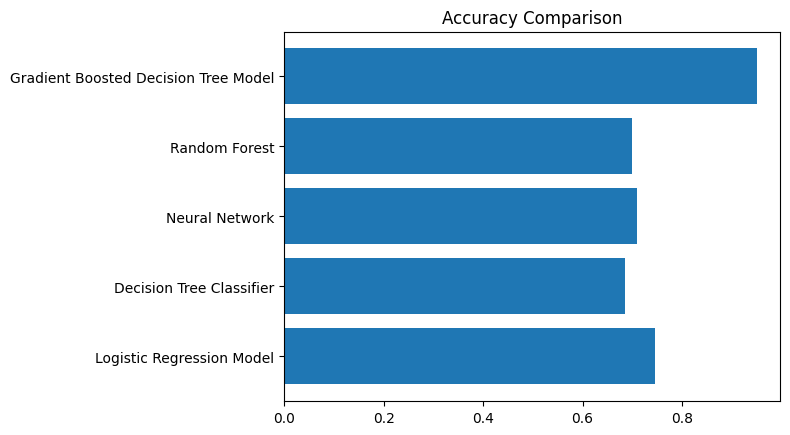

In [59]:
plt.title('Accuracy Comparison')
plt.barh(comparison['Name'], comparison['Accuracy'])

<BarContainer object of 5 artists>

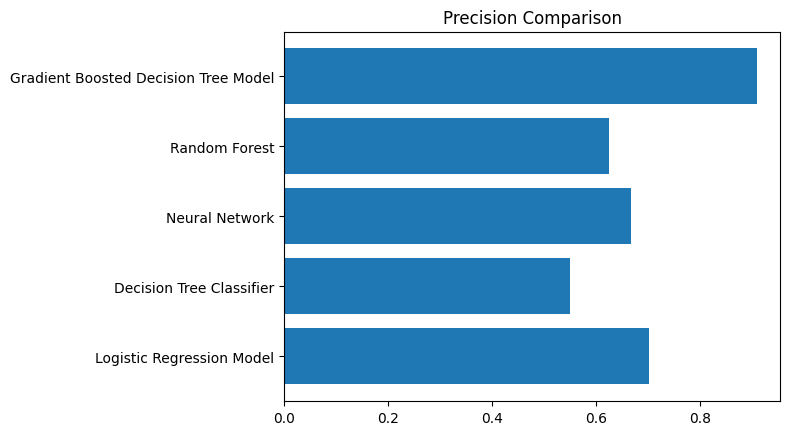

In [44]:
plt.title('Precision Comparison')
plt.barh(comparison['Name'], comparison['Precision'])

<BarContainer object of 5 artists>

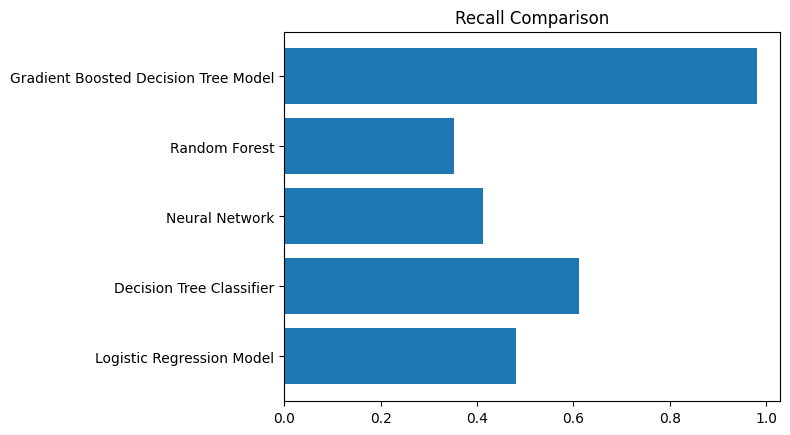

In [ ]:
plt.title('Recall Comparison')
plt.barh(comparison['Name'], comparison['Recall'])

<BarContainer object of 5 artists>

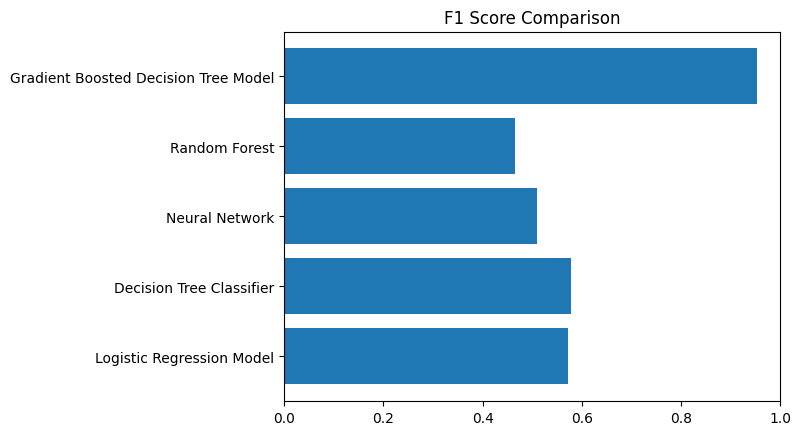

In [45]:
plt.title('F1 Score Comparison')
plt.barh(comparison['Name'], comparison['f1 score'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=657ff91a-c1e6-4fe5-8ed7-981de6ee16b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>